In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import uproot
import random
import numba


#targettree = uproot.open('Background/singMup_x2y2z300_370K.root:QA_ana')
#comparison data
targettree = uproot.open('comparison/trackQA.root:QA_ana')




targetdata = targettree.arrays(library="np")

detectorid=targettree["detectorID"].arrays(library="np")["detectorID"]
elementid=targettree["elementID"].arrays(library="np")["elementID"]

In [2]:
@numba.jit(nopython=True)
def clean(events):
    for j in range(len(events)):
        for i in range(500):
            if(events[j][i]>1000):
                events[j][i]=0
    return events

#Clean input data
elementid=clean(elementid)
detectorid=clean(detectorid)

In [3]:
detectorid

array([[1, 1, 2, ..., 0, 0, 0],
       [1, 1, 2, ..., 0, 0, 0],
       [1, 1, 2, ..., 0, 0, 0],
       [1, 1, 2, ..., 0, 0, 0]])

In [4]:
elementid

array([[ 67, 101,  67, ...,   0,   0,   0],
       [149, 126, 149, ...,   0,   0,   0],
       [ 93,  98,  94, ...,   0,   0,   0],
       [117, 100, 117, ...,   0,   0,   0]])

In [5]:
# string to search in file
with open(r'comparison/log.txt', 'r') as fp, open('Kinfo.txt','w') as fk:
    # read all lines using readline()
    lines = fp.readlines()
    for row in lines:
        # check if string present on a current line
        word = 'jindex'
        #print(row.find(word))
        # find() method returns -1 if the value is not found,
        # if found it returns index of the first occurrence of the substring
        if row.find(word) != -1:
            print('string exists in file')
            print('line Number:', lines.index(row))
            fk.write(row)

string exists in file
line Number: 1050
string exists in file
line Number: 1051
string exists in file
line Number: 1052
string exists in file
line Number: 1053
string exists in file
line Number: 1054
string exists in file
line Number: 1055
string exists in file
line Number: 1056
string exists in file
line Number: 1057
string exists in file
line Number: 1058
string exists in file
line Number: 1059
string exists in file
line Number: 1060
string exists in file
line Number: 1061
string exists in file
line Number: 1062
string exists in file
line Number: 1063
string exists in file
line Number: 1064
string exists in file
line Number: 1065
string exists in file
line Number: 1066
string exists in file
line Number: 1067
string exists in file
line Number: 1137
string exists in file
line Number: 1138
string exists in file
line Number: 1139
string exists in file
line Number: 1140
string exists in file
line Number: 1141
string exists in file
line Number: 1142
string exists in file
line Number: 1143


In [6]:
ktrackerData = np.genfromtxt('Kinfo.txt', delimiter=',')
ktrackerData = ktrackerData[~np.isnan(ktrackerData)]
ktrackerData = np.reshape(ktrackerData,(-1,9))
print(ktrackerData)

[[ 0.0000e+00 -6.0023e+01  0.0000e+00  0.0000e+00  0.0000e+00  2.8000e+01
   1.6000e+01  2.0000e+00  1.0000e+00]
 [ 1.0000e+00 -7.6445e+01 -1.0414e+02 -1.2184e+01 -5.8159e+01  2.7000e+01
   1.8000e+01  2.0000e+00  1.0000e+00]
 [ 2.0000e+00 -4.0647e+01 -4.9105e+01 -3.0643e+01 -3.9874e+01  4.5000e+01
   1.4000e+01  2.0000e+00  1.0000e+00]
 [ 0.0000e+00  2.5380e+01  0.0000e+00  0.0000e+00  0.0000e+00  6.9000e+01
   1.6000e+01  2.0000e+00  1.0000e+00]
 [ 1.0000e+00  2.0563e+01 -2.1384e+01  7.0567e+01  2.4591e+01  7.5000e+01
   1.8000e+01  2.0000e+00  1.0000e+00]
 [ 2.0000e+00  2.7057e+01  1.9388e+01  3.7850e+01  2.8619e+01  7.9000e+01
   1.4000e+01  2.0000e+00  1.0000e+00]
 [ 0.0000e+00 -9.5510e+01  0.0000e+00  0.0000e+00  0.0000e+00  1.2000e+01
   2.8000e+01  4.0000e+00  1.0000e+00]
 [ 1.0000e+00 -6.9925e+01 -1.3290e+02 -5.2375e+01 -9.2638e+01  2.4000e+01
   3.0000e+01  4.0000e+00  1.0000e+00]
 [ 2.0000e+00 -1.1597e+02 -1.2360e+02 -1.0711e+02 -1.1535e+02  2.0000e+01
   2.6000e+01  4.0000e

In [7]:
ktrackerData[20,8]

2.0

In [8]:
elemK=ktrackerData[:,5]
detK=ktrackerData[:,6]

In [9]:
ktdata=[]
for i in range(len(ktrackerData)):
    if(ktrackerData[i,8]==1):
        ktdata=np.append(ktdata,ktrackerData[i])

In [10]:
ktrackerData

array([[ 0.0000e+00, -6.0023e+01,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         2.8000e+01,  1.6000e+01,  2.0000e+00,  1.0000e+00],
       [ 1.0000e+00, -7.6445e+01, -1.0414e+02, -1.2184e+01, -5.8159e+01,
         2.7000e+01,  1.8000e+01,  2.0000e+00,  1.0000e+00],
       [ 2.0000e+00, -4.0647e+01, -4.9105e+01, -3.0643e+01, -3.9874e+01,
         4.5000e+01,  1.4000e+01,  2.0000e+00,  1.0000e+00],
       [ 0.0000e+00,  2.5380e+01,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         6.9000e+01,  1.6000e+01,  2.0000e+00,  1.0000e+00],
       [ 1.0000e+00,  2.0563e+01, -2.1384e+01,  7.0567e+01,  2.4591e+01,
         7.5000e+01,  1.8000e+01,  2.0000e+00,  1.0000e+00],
       [ 2.0000e+00,  2.7057e+01,  1.9388e+01,  3.7850e+01,  2.8619e+01,
         7.9000e+01,  1.4000e+01,  2.0000e+00,  1.0000e+00],
       [ 0.0000e+00, -9.5510e+01,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         1.2000e+01,  2.8000e+01,  4.0000e+00,  1.0000e+00],
       [ 1.0000e+00, -6.9925e+01, -1.3290e+02, -5.2375e+01, -9

In [11]:
np.where(detectorid==18)

(array([0, 0, 1, 1, 2, 2, 3, 3], dtype=int64),
 array([14, 15, 14, 15, 14, 15, 14, 15], dtype=int64))

In [12]:
#check

for i in range(len(elemK)):
    test = elemK[i] in elementid[0]
    print(test)
    if(test == False):
        print(elemK[i], detK[i])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
77.0 16.0
False
78.0 18.0
False
92.0 14.0
True
False
93.0 18.0
False
96.0 14.0
True
True
False
90.0 26.0
False
108.0 28.0
False
109.0 30.0
False
123.0 26.0
True
False
127.0 2.0
False
139.0 6.0
True
False
52.0 18.0
False
61.0 14.0
False
83.0 16.0
True
False
103.0 14.0
False
44.0 28.0
False
50.0 30.0
False
58.0 26.0
False
106.0 28.0
False
122.0 30.0
False
106.0 26.0
True
False
93.0 1.0
False
106.0 6.0
True
False
99.0 2.0
False
137.0 6.0
False
59.0 16.0
False
54.0 18.0
True
False
74.0 16.0
False
74.0 18.0
False
90.0 14.0
False
54.0 28.0
False
71.0 30.0
True
False
90.0 28.0
False
100.0 30.0
True
False
115.0 4.0
False
117.0 2.0
False
152.0 6.0
False
93.0 4.0
True
False
127.0 6.0


In [38]:
patialTracks=np.column_stack((detectorid[0],elementid[0]))
np.save('partialTrackCompare.npy',patialTracks)

In [42]:
patialTracks

array([[  1,  67],
       [  1, 101],
       [  2,  67],
       [  2, 102],
       [  5,  87],
       [  5, 112],
       [  6,  88],
       [  6, 113],
       [  3,  55],
       [  3,  86],
       [  4,  56],
       [  4,  87],
       [ 17,  27],
       [ 17,  75],
       [ 18,  27],
       [ 18,  75],
       [ 13,  46],
       [ 13,  79],
       [ 14,  45],
       [ 14,  79],
       [ 16,  28],
       [ 16,  69],
       [ 15,  28],
       [ 15,  69],
       [ 30,  24],
       [ 30,  82],
       [ 29,  24],
       [ 29,  82],
       [ 26,  20],
       [ 26,  97],
       [ 25,  21],
       [ 25,  97],
       [ 28,  12],
       [ 28,  81],
       [ 27,  12],
       [ 27,  81],
       [ 57,   3],
       [ 58,  29],
       [ 61,   5],
       [ 62,  35],
       [ 31,   9],
       [ 31,  13],
       [ 33,   9],
       [ 34,   6],
       [ 37,   3],
       [ 37,  11],
       [ 35,   9],
       [ 36,   5],
       [ 39,   1],
       [ 39,   2],
       [ 39,  12],
       [ 45,   2],
       [ 45,

total particals in station1: 5
end of Station 1
next index: 26
total particals in station2: 2
This is the event: 1
This is the event: 1
This is the event: 1
This is the event: 1
end of station 2
total particals in station3: 0


ValueError: empty range for randrange() (1, 1, 0)

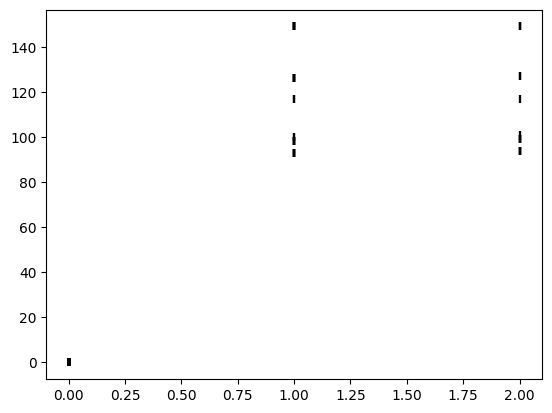

In [21]:
#testing

ptracksElem=np.zeros(5000)
ptracksDet=np.zeros(5000)





#print("This is the event:",n)
j=0
m=5#random.randrange(5,15)
print("total particals in station1:",m)
#while j<m:
#print(n,r,s)
while j<m:
    n=random.randrange(0,len(elementid)) #Select random event number
   # print("This is event:",n)
    i=0
    
    d=random.randrange(1,7)
    #d=random.randrange(2,7)
   # print("this is d",d)
    while detectorid[n][i]<=d:
        ptracksElem[i+6*j]=elementid[n][i]
        ptracksDet[i+6*j]=detectorid[n][i]
       # print("det", detectorid[n][i], "elem", elementid[n][i],"i",i)
       # print("ptdet", ptracksDet[i+6*j],"ptelem",ptracksElem[i+6*j])
        plt.scatter(ptracksDet[:],ptracksElem[:],marker='|',color='black')
       # plt.scatter(detectorid[n],elementid[n],marker='_',color='red')
        i+=1
      #  print("index:",i+6*j,i,j)
    j+=1
    next=(i+6*j)-6
else:
    print("end of Station 1")
    print("next index:",next)
    j=0
    
b=round(.5*m)
print("total particals in station2:",b)

while j<random.randrange(b,m):
    r=random.randrange(1,n)
    print("This is the event:",r)
    i=6
    
    d=random.randrange(13,19)
    #print("this is d",d)
    while detectorid[r][i]>=13 and detectorid[r][i]<=d:
        ptracksElem[next]=elementid[r][i]
        ptracksDet[next]=detectorid[r][i]
        #print("det", detectorid[r][i], "i",i)
        #print("ptdet", ptracksDet[i+6*j],"ptelem",ptracksElem[i+6*j])
        plt.scatter(ptracksDet[:],ptracksElem[:],marker='|',color='black')
       # plt.scatter(detectorid[r],elementid[r],marker='_',color='blue')
        i+=1
        next+=1
     #   print("index:",next,i,j)

    j+=1
    #print(j)
else:
    print("end of station 2")
    j=0
    
b=round(.25*b)
print("total particals in station3:",b)
while j<random.randrange(b,m):
    #print(i)
    s=random.randrange(1,r)
   # print("This is the event:",s)
    i=12
    d=random.randrange(19,31)
    #print("this is d",d)
    while detectorid[s][i]>=19 and detectorid[s][i]<=30:
        ptracksElem[next]=elementid[s][i]
        ptracksDet[next]=detectorid[s][i]
       # print("det", detectorid[s][i], "i",i)
        plt.scatter(ptracksDet[:],ptracksElem[:],marker='|',color='black')
        #plt.scatter(detectorid[s],elementid[s],marker='_',color='green')
        i+=1
        next+=1
    #    print("index:",next,i,j)
    j+=1
else:
    print("end")
    

#plt.scatter(ptracksDet[:],ptracksElem[:],marker='d',color='black')
plt.xlim(0,6)

In [23]:
r

1

NameError: name 'ptracksDet' is not defined

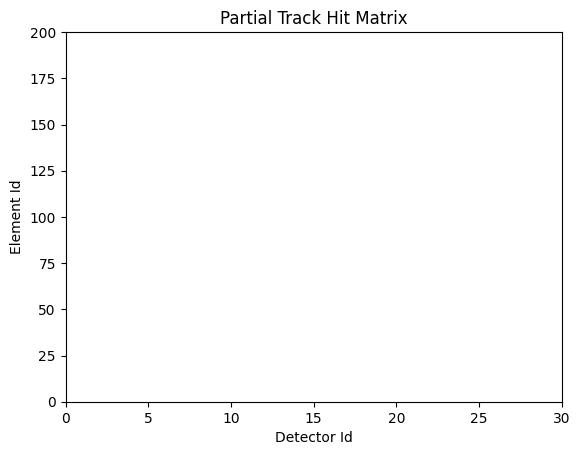

In [6]:
plt.xlim(0,30)
plt.ylim(0,200)
plt.xlabel("Detector Id")
plt.ylabel("Element Id")
plt.title("Partial Track Hit Matrix")
#plt.scatter(detectorid[164759],elementid[164759],marker='_',color='red')
#plt.scatter(detectorid[40263],elementid[40263],marker='_',color='blue')
#plt.scatter(detectorid[191369],elementid[191369],marker='_',color='green')
#plt.scatter(detectorid[221469],elementid[221469],marker='_',color='pink')
plt.scatter(ptracksDet[:],ptracksElem[:],marker='_',color='black')

q is: [1.]
q is: [1. 0.]
q is: [1. 0. 0.]
q is: [1. 0. 0. 1.]
q is: [1. 0. 0. 1. 1.]
q is: [1. 0. 0. 1. 1. 0.]
q is: [1. 0. 0. 1. 1. 0. 0.]
q is: [1. 0. 0. 1. 1. 0. 0. 0.]
q is: [1. 0. 0. 1. 1. 0. 0. 0. 0.]
q is: [1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]


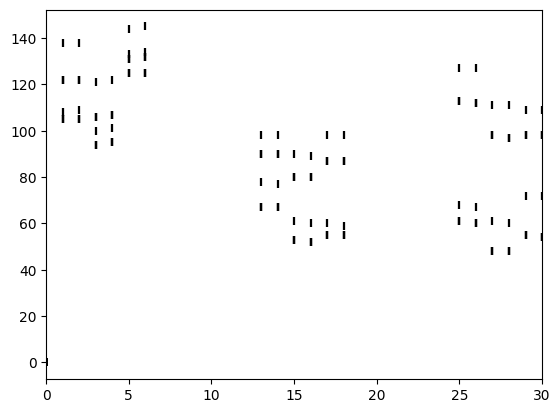

In [39]:
q=[]

for i in range(10):
    q=np.append(q,[random.randrange(0,len(detectorid))])
    #q=np.append(q,[0])
    print("q is:",q)
    plt.scatter(detectorid[q[i].astype(int)],elementid[q[i].astype(int)],marker='|',color='black')
    plt.xlim(0,30)

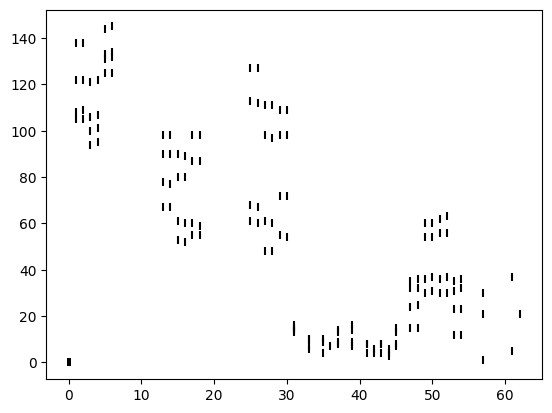

In [46]:
q=[]

for i in range(len(detectorid)):
    q=np.append(q,[i])
    plt.scatter(detectorid[q[i].astype(int)],elementid[q[i].astype(int)],marker='|',color='black')


array([0., 1.])

In [49]:
detectorid[q[0].astype(int)]

array([ 1,  1,  2,  2,  5,  5,  6,  6,  3,  3,  4,  4, 17, 17, 18, 18, 13,
       13, 14, 14, 16, 16, 15, 15, 30, 30, 29, 29, 26, 26, 25, 25, 28, 28,
       27, 27, 57, 57, 61, 62, 31, 31, 33, 33, 37, 37, 35, 36, 39, 39, 45,
       45, 41, 42, 43, 44, 49, 49, 50, 50, 47, 47, 48, 48, 51, 51, 52, 52,
       53, 53, 54, 54,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [11]:
#injectedElem=[]
#injectedDet=[]

#for i in range(len(q)):
injectedDet=detectorid[0]
injectedElem=elementid[0]



In [13]:
injectedDet=detectorid[0]
injectedElem=elementid[0]

In [12]:
#injectedDet=np.reshape(injectedDet,(5,-1))
#injectedElem=np.reshape(injectedElem,(5,-1))
injectedTracks=np.column_stack((injectedDet,injectedElem))


In [39]:
np.save('injectedTrackscompare2.npy',injectedTracks)


In [41]:
partialTracks

NameError: name 'partialTracks' is not defined

In [9]:
for j in range(len(q)):
    i=0
    while detectorid[q[j].astype(int)][i]>0:
        ptracksDet[next]=detectorid[q[j].astype(int)][i]
        ptracksElem[next]=elementid[q[j].astype(int)][i]
        print(i)
        print("det", detectorid[q[j].astype(int)][i])
        i+=1
        next+=1
        print(next, i)

NameError: name 'ptracksDet' is not defined

NameError: name 'ptracksDet' is not defined

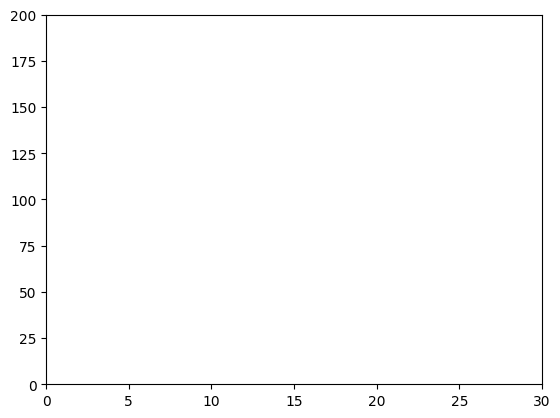

In [10]:
plt.xlim(0,30)
plt.ylim(0,200)
plt.scatter(ptracksDet[:],ptracksElem[:],marker='_',color='black')
plt.scatter(detectorid[q[0].astype(int)],elementid[q[0].astype(int)],marker='|',color='red')
#plt.scatter(detectorid[q[1].astype(int)],elementid[q[1].astype(int)],marker='|',color='blue')

In [17]:
patialTracks=np.column_stack((ptracksDet,ptracksElem))
np.save('partialTrackTests5.npy',patialTracks)

In [13]:
injectedTracks=np.column_stack((detectorid[q[0].astype(int)],elementid[q[0].astype(int)]))
#injectedTrack2=np.column_stack((detectorid[q[1].astype(int)],elementid[q[1].astype(int)]))

#injectedTrack3=np.column_stack((detectorid[q[2].astype(int)],elementid[q[2].astype(int)]))
#injectedTrack4=np.column_stack((detectorid[q[3].astype(int)],elementid[q[3].astype(int)]))

#injectedTracks=np.concatenate((injectedTrack1, injectedTrack2,injectedTrack3,injectedTrack4))
#injectedTracks = injectedTracks[~np.all(injectedTracks == 0, axis=1)]


np.save('injectedTrackscompare.npy',injectedTracks)
#np.save('injectedTrack2.npy',injectedTrack2)

In [14]:
injectedTracks

array([[  1,  96],
       [  1, 104],
       [  2,  96],
       [  2, 104],
       [  5, 115],
       [  5, 112],
       [  6, 116],
       [  6, 113],
       [  3,  85],
       [  3,  87],
       [  4,  85],
       [  4,  88],
       [ 17,  47],
       [ 17,  85],
       [ 18,  47],
       [ 18,  85],
       [ 13,  64],
       [ 13,  87],
       [ 14,  63],
       [ 14,  87],
       [ 16,  46],
       [ 16,  78],
       [ 15,  47],
       [ 15,  78],
       [ 30,  49],
       [ 30,  99],
       [ 29,  49],
       [ 29,  99],
       [ 26,  48],
       [ 26, 114],
       [ 25,  48],
       [ 25, 115],
       [ 28,  39],
       [ 28,  99],
       [ 27,  39],
       [ 27,  99],
       [ 58,  25],
       [ 61,   3],
       [ 62,  31],
       [ 31,  12],
       [ 31,  13],
       [ 33,   6],
       [ 33,  10],
       [ 37,   7],
       [ 37,  12],
       [ 35,   9],
       [ 36,   5],
       [ 39,   5],
       [ 39,  14],
       [ 45,   6],
       [ 45,  14],
       [ 41,   8],
       [ 42,